In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from background_removal_exp import background_remover_w2 as background_remover
from descriptors import preprocess_image
from image_split import split_images

Processing 00000.jpg ...
Original image shape: (1375, 1047, 3)


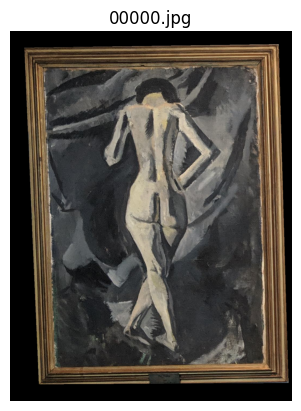

Processing 00001.jpg ...
Original image shape: (1781, 1548, 3)


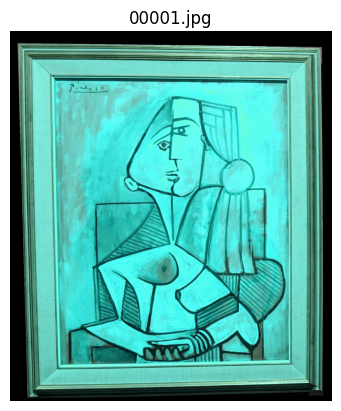

Processing 00002.jpg ...
Original image shape: (432, 382, 3)


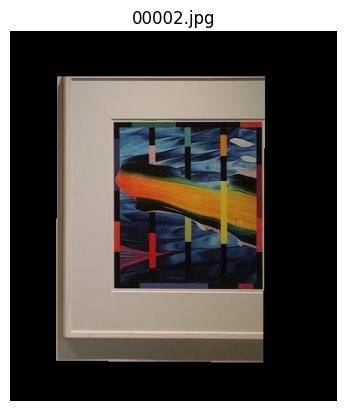

Processing 00003.jpg ...
Original image shape: (620, 298, 3)


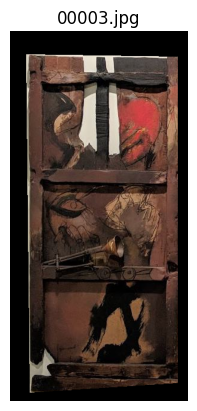

Processing 00004.jpg ...
Original image shape: (312, 486, 3)


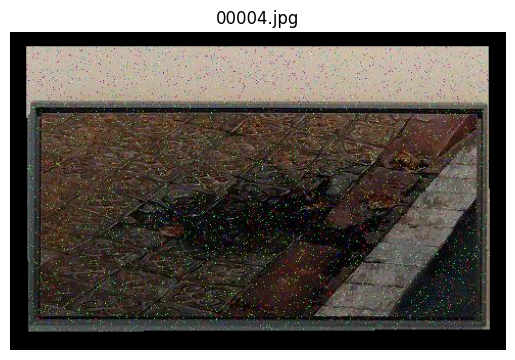

Processing 00005.jpg ...
Original image shape: (386, 261, 3)


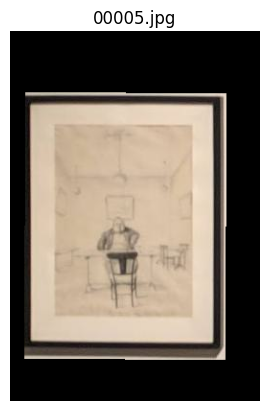

Processing 00006.jpg ...
Original image shape: (701, 730, 3)


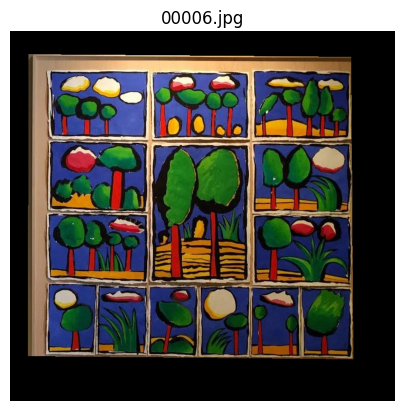

Processing 00007.jpg ...
Original image shape: (2293, 1692, 3)


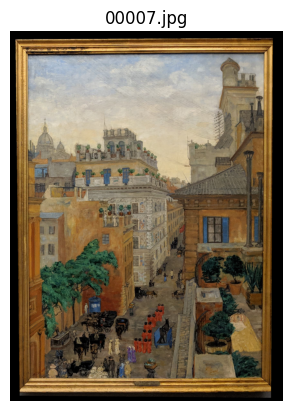

Processing 00008.jpg ...
Original image shape: (536, 891, 3)
Left image shape: (536, 500, 3)
Right image shape: (536, 391, 3)


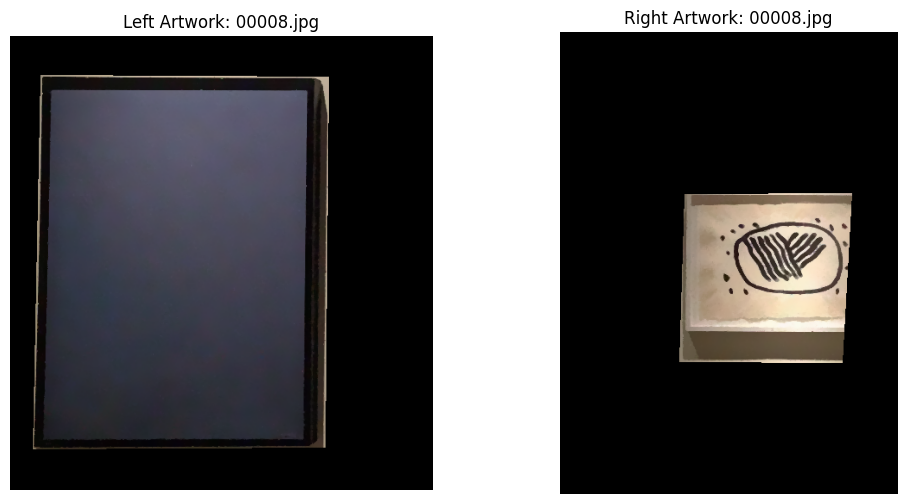

Processing 00009.jpg ...
Original image shape: (2053, 1844, 3)


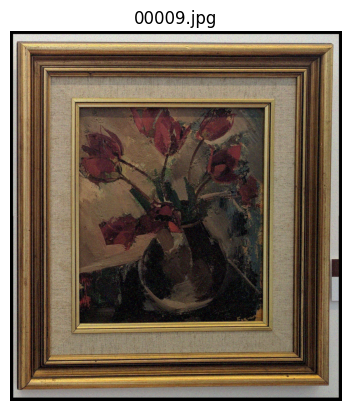

Processing 00010.jpg ...
Original image shape: (730, 890, 3)


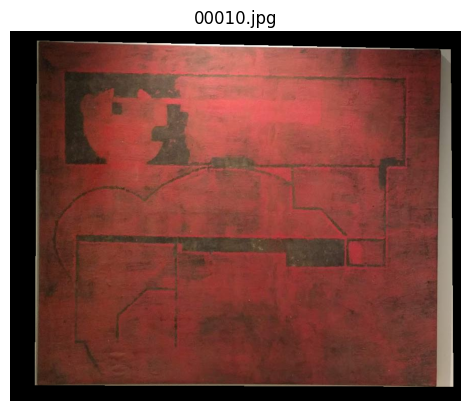

Processing 00011.jpg ...
Original image shape: (401, 684, 3)


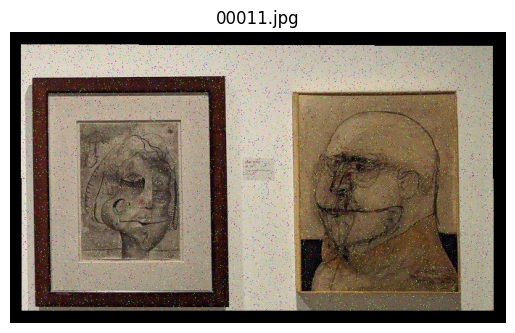

Processing 00012.jpg ...
Original image shape: (438, 876, 3)
Left image shape: (438, 516, 3)
Right image shape: (438, 360, 3)


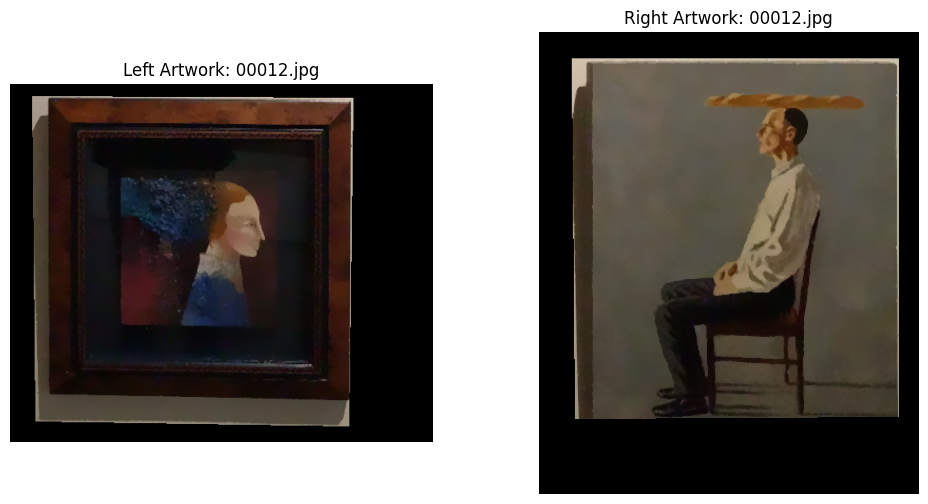

Processing 00013.jpg ...
Original image shape: (586, 579, 3)


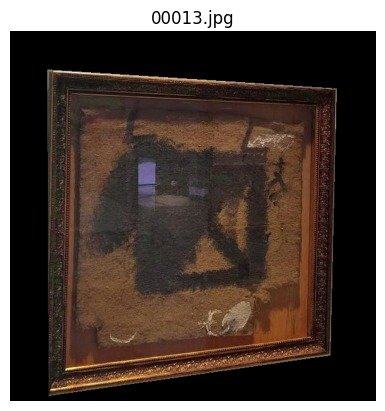

Processing 00014.jpg ...
Original image shape: (1838, 1779, 3)


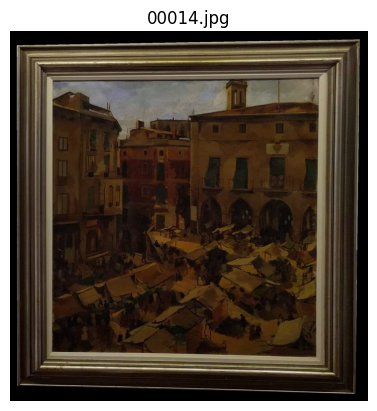

Processing 00015.jpg ...
Original image shape: (679, 1404, 3)


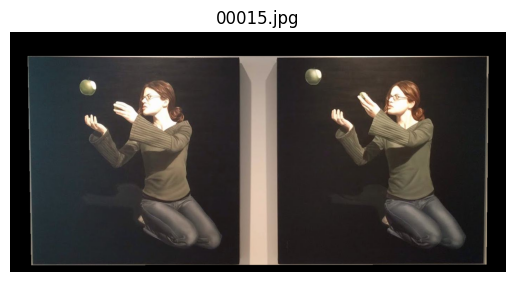

Processing 00016.jpg ...
Original image shape: (574, 741, 3)


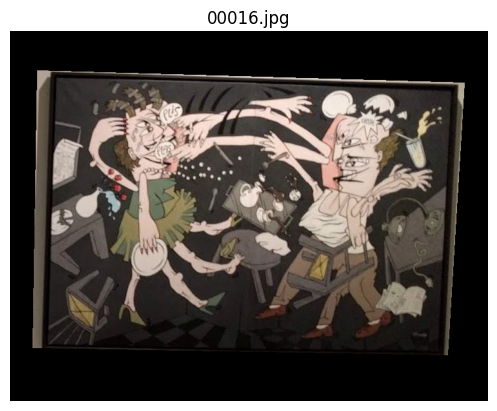

Processing 00017.jpg ...
Original image shape: (2103, 1671, 3)


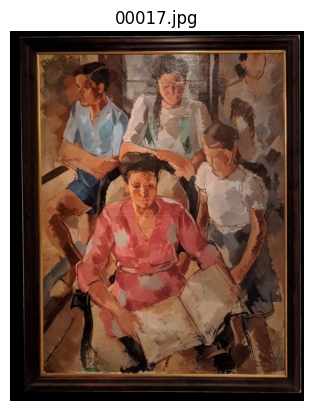

Processing 00018.jpg ...
Original image shape: (2183, 1793, 3)


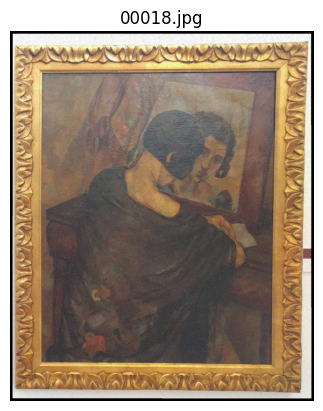

Processing 00019.jpg ...
Original image shape: (871, 886, 3)


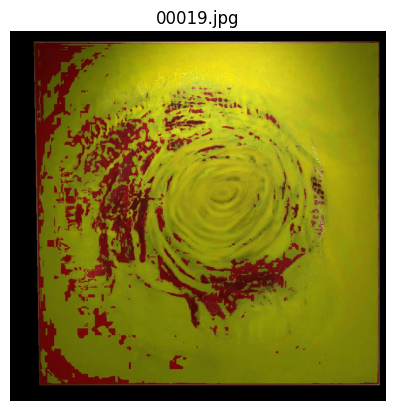

Processing 00020.jpg ...
Original image shape: (641, 714, 3)


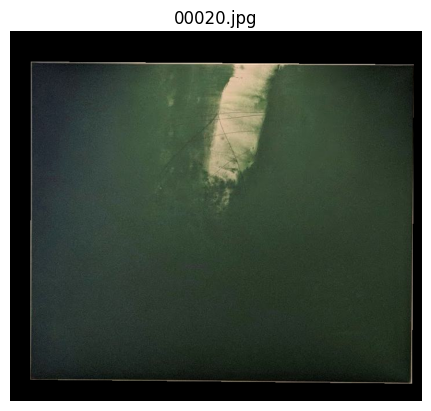

Processing 00021.jpg ...
Original image shape: (496, 473, 3)


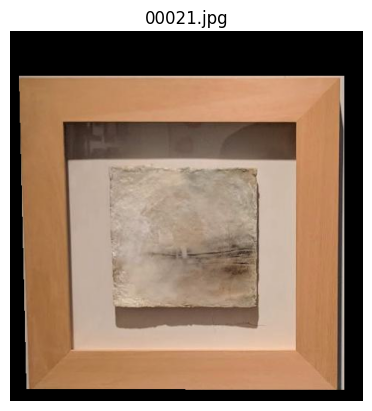

Processing 00022.jpg ...
Original image shape: (291, 983, 3)
Left image shape: (291, 544, 3)
Right image shape: (291, 439, 3)


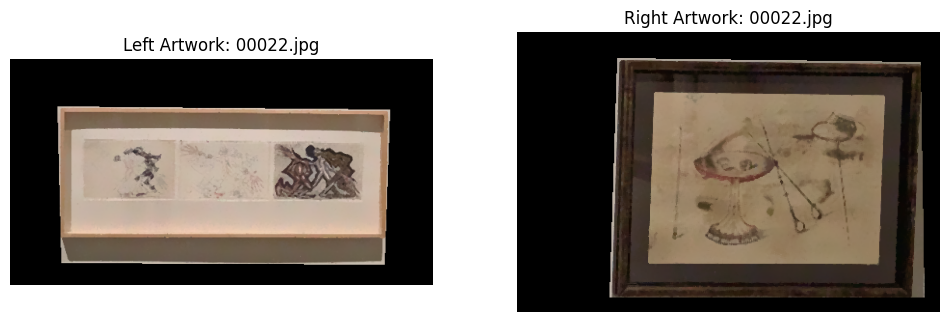

Processing 00023.jpg ...
Original image shape: (434, 544, 3)


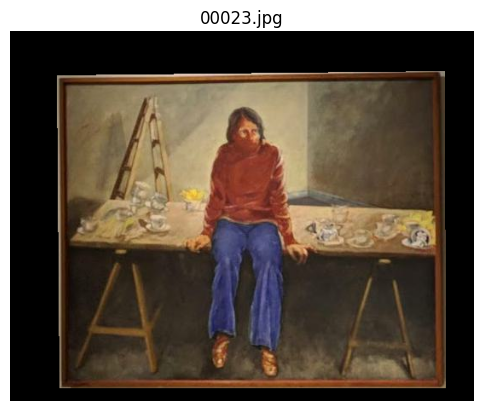

Processing 00024.jpg ...
Original image shape: (674, 677, 3)


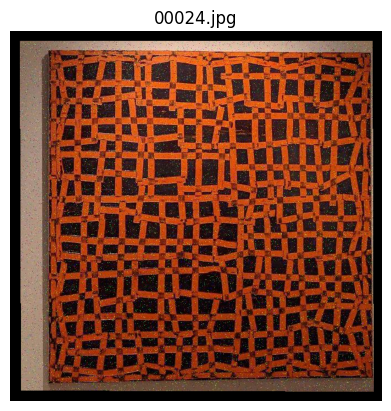

Processing 00025.jpg ...
Original image shape: (741, 2049, 3)
Left image shape: (741, 969, 3)
Right image shape: (741, 1080, 3)


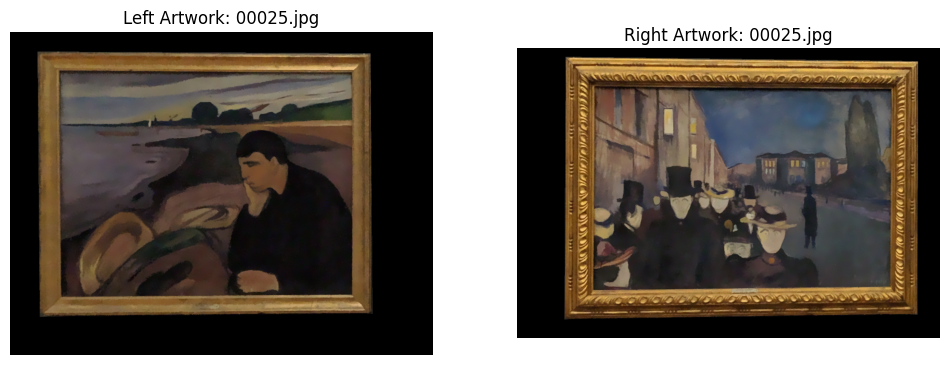

Processing 00026.jpg ...
Original image shape: (661, 1547, 3)
Left image shape: (661, 808, 3)
Right image shape: (661, 739, 3)


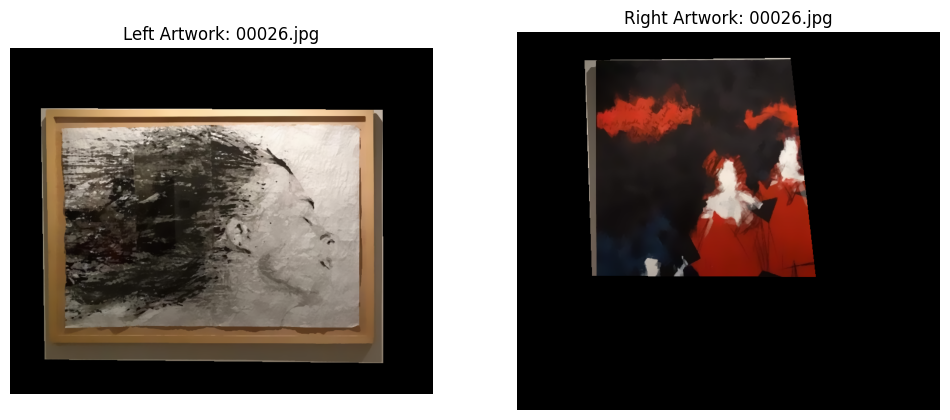

Processing 00027.jpg ...
Original image shape: (586, 413, 3)


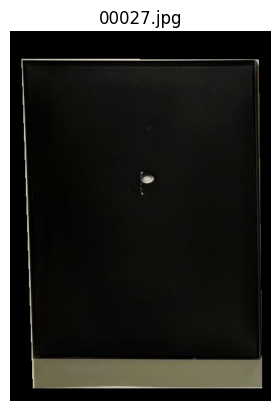

Processing 00028.jpg ...
Original image shape: (1551, 3871, 3)
Left image shape: (1551, 1843, 3)
Right image shape: (1551, 2028, 3)


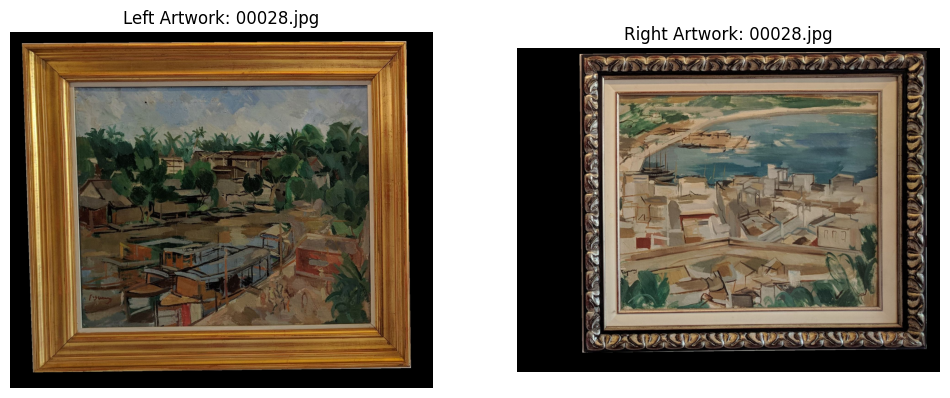

Processing 00029.jpg ...
Original image shape: (637, 1060, 3)
Left image shape: (637, 705, 3)
Right image shape: (637, 355, 3)


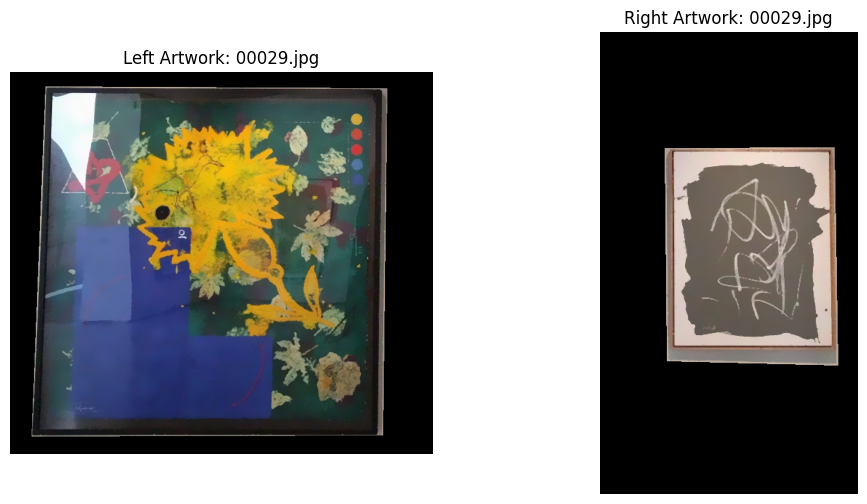

In [2]:


# Path to your new dataset
IMG_FOLDER = "../Data/Week3/qst2_w3/"

def process_images(img_folder):
    """Process all images in the folder."""
    image_names = sorted([f for f in os.listdir(img_folder) if f.endswith('.jpg')])

    for img_name in image_names:
        print(f"Processing {img_name} ...")
        img_path = os.path.join(img_folder, img_name)
        img = cv2.imread(img_path)

        print(f"Original image shape: {img.shape}")

        if img is None:
            print(f"⚠️ Skipping {img_name}: could not read image.")
            continue

        # --- Separación de imágenes ---
        _, splitted = split_images(preprocess_image(img))

        # --- Evaluación y visualización ---
        if isinstance(splitted, tuple):
            left_artwork, right_artwork = splitted

            #left_artwork = preprocess_image(left_artwork)
            #right_artwork = preprocess_image(right_artwork)

            _, left_mask, left_output, _ = background_remover.remove_background_morphological_gradient(left_artwork)
            _, right_mask, right_output, _ = background_remover.remove_background_morphological_gradient(right_artwork)

            print(f"Left image shape: {left_output.shape}")
            print(f"Right image shape: {right_output.shape}")

            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(left_output, cv2.COLOR_BGR2RGB))
            plt.title(f"Left Artwork: {img_name}")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(right_output, cv2.COLOR_BGR2RGB))
            plt.title(f"Right Artwork: {img_name}")
            plt.axis('off')

        else:
            #img = preprocess_image(splitted)
            _, mask, output, _ = background_remover.remove_background_morphological_gradient(img)

            plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
            plt.title(f"{img_name}")
            plt.axis('off')

        plt.show()

# Run the function
process_images(IMG_FOLDER)